ChEn-3170: Computational Methods in Chemical Engineering Fall 2020 UMass Lowell; Prof. V. F. de Almeida **27Oct20**

# 10. Universal Linear Solver
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents<a id="toc">
* [Introduction](#intro)
* [Any Linear System (Detailed Algorithm)](#any)
* [Universal Solver](#usolver)
---

## [Introduction](#toc)<a id="intro"></a>

Recall course notes OneNote [ChEn-3170-universal-lsolver](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EiMhp_DKV8ZDvbXOjv2fmJ0BO9EY38Kvcds4xZjSKPlDwQ?e=wCO9vz) on computational stoichiometry including an introduction to the linear, rank-deficient, least-squares method.

Compute the solution vector $\xvec$ for a given matrix $\Amtrx$ and right-side vector $\bvec$:

\begin{equation*}
\Amtrx\,\xvec= \bvec .
\end{equation*}

When $\Amtrx$ is rank deficient, $\Amtrx^\top\Amtrx$ is also rank deficient (or singular). The normal equations 

\begin{equation*}
\boxed{\Amtrx^\top\Amtrx\,\xvec_\text{LS}  = \Amtrx^\top\,\bvec },
\end{equation*}

*either have an infinite number of solutions or have no solution*. 

Since $\Amtrx$ is rank deficient, a **unique** mininum-norm least squares solution, $\xvec_\text{MNLS}$, exists as follows,

\begin{equation*}
 \lim\limits_{\epsilon\rightarrow 0}\,\min\limits_\xvec \bigl( \norm{\bvec - \Amtrx\,\xvec_\text{MNLS}}^2 + \epsilon\norm{\xvec_\text{MNLS}}^2 \bigr) \quad\  \forall \quad\ \xvec.
\end{equation*}

This solution is obtained by solving:

\begin{equation*}
\boxed{
\lim\limits_{\epsilon\rightarrow 0}\,\bigl(\Amtrx^\top\Amtrx + \epsilon\Imtrx\bigr) \xvec_\text{MNLS}  = \Amtrx^\top\,\bvec },
\end{equation*}

where $\Amtrx^\top\Amtrx + \epsilon\Imtrx$ is square, symmetric and full rank. This augmented least-squares problem has a unique solution.

## [Any Linear System (Detailed Algorithm)](#toc)<a id="any"></a>
Refer to course Notebooks 08 and 09.

In [1]:
'''Any A matrix'''

import numpy as np

nrows = 20
ncols = 32

a = -120.2
b =  808.7

set_rank_deficient = True # set to True or False

a_mtrx = (b-a)*np.random.random((nrows,ncols)) + a

if set_rank_deficient:
    if nrows >= ncols:
        a_mtrx[:,-1] = 0.0
    if nrows < ncols:
        a_mtrx[-1,:] = 0.0
        
np.set_printoptions(precision=3, threshold=500, edgeitems=4, linewidth=100)
print('A =\n',a_mtrx)

A =
 [[ 645.457  673.726  730.988  263.588 ...  778.317  375.815  144.047  159.801]
 [  12.446  703.252  -22.137  438.848 ...   73.323  624.415  577.936  618.456]
 [ 762.033  200.469  569.549  137.37  ...  326.848  328.784  -60.269  675.562]
 [ 476.775    2.356  -96.948  730.476 ...  388.894  -56.981  454.377  425.349]
 ...
 [ 607.281  338.055  498.063  136.453 ...  119.965  772.859 -100.272  338.635]
 [  -1.749  755.798  219.598  394.531 ...  106.595  237.846  163.257  805.177]
 [ 330.988  345.462  135.118  577.941 ...  -54.665   29.447  572.681  581.912]
 [   0.       0.       0.       0.    ...    0.       0.       0.       0.   ]]


In [2]:
'''Rank of A'''

try:    
    from chen_3170.toolkit import matrix_rank   
except ModuleNotFoundError:
    assert False, 'You need to provide your own matrix_rank function here. Bailing out.'

a_rank = matrix_rank(a_mtrx)
print('S shape   = ',a_mtrx.shape)
print('Rank of S = ',a_rank)

if a_rank == min(a_mtrx.shape):
    print('Matrix is full rank.')
else:
    print('Matrix is rank deficient.')
    
assert a_rank == np.linalg.matrix_rank(a_mtrx)

S shape   =  (20, 32)
Rank of S =  19
Matrix is rank deficient.


In [3]:
'''Any right side vector'''

import numpy as np

a = -40.2
b =  3.7

b_vec = (b-a)*np.random.random(nrows) + a # production rates

np.set_printoptions(precision=3, threshold=100, edgeitems=3, linewidth=100)
print('b_vec =\n',b_vec)

b_vec =
 [-36.407 -13.172 -26.131  -6.774 -22.206 -26.147 -12.394 -24.695  -9.44   -4.908 -28.476 -27.288
 -26.914 -20.902 -35.39  -33.91   -6.874 -12.242 -10.028 -14.959]


In [4]:
'''Compute the MNLS solution'''

import numpy as np

try:    
    from chen_3170.toolkit import solve   
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'

# build and solve A x = b MNLS problem

epsilon_values = np.logspace(+2,-6,10)

np.set_printoptions(precision=3, threshold=100, edgeitems=3, linewidth=100)

x_norm_history = list()
    
for epsilon in epsilon_values:
    
    print('')
    print('epsilon = %1.1e'%epsilon)
    print('')

    mtrx = a_mtrx.transpose() @ a_mtrx + epsilon * np.eye(a_mtrx.shape[1]) # AT A + epsilon I, AT A is the normal matrix
    vec  = a_mtrx.transpose() @ b_vec                            # AT b

    # Solve (ATA + epsilon I) x = AT b
    x_vec = solve(mtrx, vec, pivot_tol=1e-6, zero_tol=1e-8) # matrix is full rank; partial pivoting works
    #x_vec = np.linalg.solve(mtrx, vec)
    #print('')
    #print('x_vec=\n',x_vec)
    #print('')
        
    x_norm = np.linalg.norm(x_vec)
    print('||x|| = %8.5e'%x_norm)
    
    x_norm_history.append( x_norm ) # save for plotting
    
    # test my solution against NumPy solve
    print('max(abs(x_vec-x_vec_numpy)) = %2.2e'%np.max(np.abs((x_vec - np.linalg.solve(mtrx, vec)))))
    
    print('')
    residual_vec = b_vec - a_mtrx @ x_vec
    print('||b - A x||^2 + eps*||x||^2 = %8.5e'%(np.linalg.norm(residual_vec)**2 + epsilon*x_norm**2))
    print('||b - A x|| +       ||x||   = %8.5e'%(np.linalg.norm(residual_vec) + x_norm))
    print('||b - A x||                 = %8.5e'%(np.linalg.norm(residual_vec)))


epsilon = 1.0e+02

||x|| = 3.78807e-02
max(abs(x_vec-x_vec_numpy)) = 1.78e-13

||b - A x||^2 + eps*||x||^2 = 2.23920e+02
||b - A x|| +       ||x||   = 1.49970e+01
||b - A x||                 = 1.49592e+01

epsilon = 1.3e+01

||x|| = 3.78837e-02
max(abs(x_vec-x_vec_numpy)) = 1.60e-12

||b - A x||^2 + eps*||x||^2 = 2.23795e+02
||b - A x|| +       ||x||   = 1.49970e+01
||b - A x||                 = 1.49592e+01

epsilon = 1.7e+00

||x|| = 3.78841e-02
max(abs(x_vec-x_vec_numpy)) = 1.58e-11

||b - A x||^2 + eps*||x||^2 = 2.23779e+02
||b - A x|| +       ||x||   = 1.49971e+01
||b - A x||                 = 1.49592e+01

epsilon = 2.2e-01

||x|| = 3.78842e-02
max(abs(x_vec-x_vec_numpy)) = 6.30e-11

||b - A x||^2 + eps*||x||^2 = 2.23777e+02
||b - A x|| +       ||x||   = 1.49971e+01
||b - A x||                 = 1.49592e+01

epsilon = 2.8e-02

||x|| = 3.78842e-02
max(abs(x_vec-x_vec_numpy)) = 1.11e-09

||b - A x||^2 + eps*||x||^2 = 2.23777e+02
||b - A x|| +       ||x||   = 1.49971e+01
||b - A x|| 

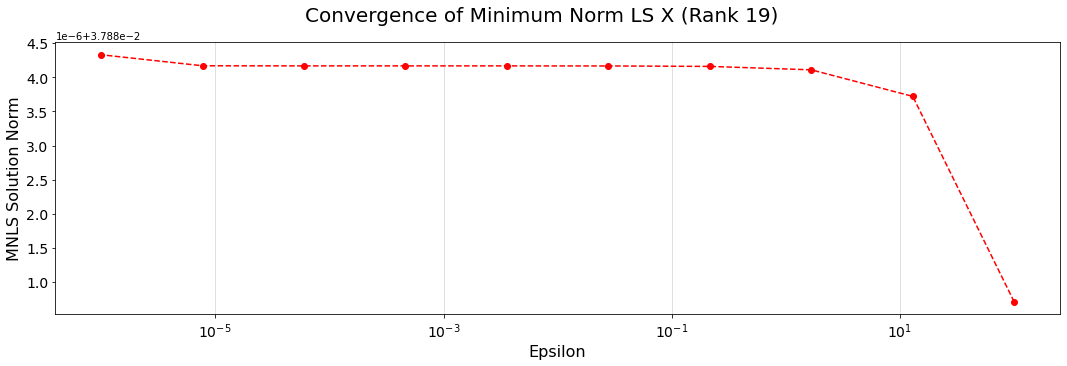

In [5]:
'''Plot Convergence of the Shortest Least-Square Solution Vector'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
%matplotlib inline

fig, ax = plt.subplots(figsize=(18,5))
ax.semilogx(epsilon_values, x_norm_history,'ro--')
ax.set_ylabel('MNLS Solution Norm',fontsize=16)
ax.set_xlabel('Epsilon',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.suptitle('Convergence of Minimum Norm LS X (Rank %s)'%str(a_rank),fontsize=20)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
plt.show()

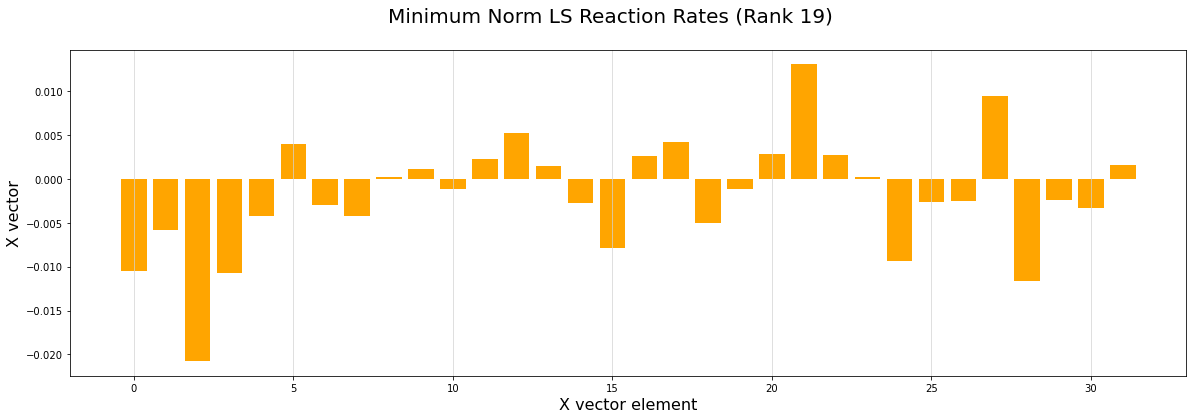

In [6]:
'''Minimum norm least-squares reaction rates'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,6))
ax.bar(range(x_vec.size), x_vec, color='orange')

ax.set_ylabel('X vector',fontsize=16)
ax.set_xlabel('X vector element',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Minimum Norm LS Reaction Rates (Rank %s)'%str(a_rank),fontsize=20)
plt.show()

## [Universal Solver](#toc)<a id="usolver"></a>

Compute the solution vector $\xvec$, given $\Amtrx$ and $\bvec$:

\begin{equation*}
\Amtrx\,\xvec= \bvec .
\end{equation*}

In [7]:
'''Any A matrix'''

import numpy as np

nrows = 20
ncols = 32

a = -120.2
b =  808.7

set_rank_deficient = True # set to True or False

a_mtrx = (b-a)*np.random.random((nrows,ncols)) + a

if set_rank_deficient:
    if nrows >= ncols:
        a_mtrx[:,-1] = 0.0
    if nrows < ncols:
        a_mtrx[-1,:] = 0.0
        
np.set_printoptions(precision=3, threshold=100, edgeitems=4, linewidth=100)
print('A =\n',a_mtrx)

A =
 [[ -40.849  473.878  542.353  325.467 ...  795.44    44.017  659.041  626.225]
 [ 144.012  530.113  702.529  130.837 ...   83.191  116.881  429.953  685.108]
 [ 149.234   30.463  653.84   734.478 ...   66.137  -86.328  -44.49   761.658]
 [  89.319   28.897  446.252  431.498 ...  -50.806  -51.357  471.543  376.394]
 ...
 [  -7.206  -84.208   19.382  363.852 ...  205.404 -119.506  777.024  562.721]
 [ -64.392  -96.167  367.775   70.525 ...  451.912  -87.045    2.471  767.314]
 [ 341.817  -40.579  633.103  685.149 ...  205.116  315.68   -39.902  515.178]
 [   0.       0.       0.       0.    ...    0.       0.       0.       0.   ]]


In [8]:
'''Rank of A'''

try:    
    from chen_3170.toolkit import matrix_rank   
except ModuleNotFoundError:
    assert False, 'You need to provide your own matrix_rank function here. Bailing out.'

a_rank = matrix_rank(a_mtrx)
print('S shape   = ',a_mtrx.shape)
print('Rank of S = ',a_rank)

if a_rank == min(a_mtrx.shape):
    print('Matrix is full rank.')
else:
    print('Matrix is rank deficient.')
    
assert a_rank == np.linalg.matrix_rank(a_mtrx)

S shape   =  (20, 32)
Rank of S =  19
Matrix is rank deficient.


In [9]:
'''Any right side vector'''

import numpy as np

a = -40.2
b =  3.7

b_vec = (b-a)*np.random.random(nrows) + a # production rates

np.set_printoptions(precision=3, threshold=100, edgeitems=3, linewidth=100)
print('b_vec =\n',b_vec)

b_vec =
 [-19.927 -23.91   -5.562 -25.178 -36.024 -33.788 -16.109 -23.368  -4.7   -23.344 -23.611 -15.864
 -24.191 -11.708  -0.444 -11.295   2.563 -24.149 -26.19   -6.892]


In [10]:
import numpy as np

try:    
    from chen_3170.toolkit import universal_solve   
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'

x_vec = universal_solve(a_mtrx, b_vec, pivot_tol=1e-6, zero_tol=1e-8)

print('max(abs(b - Ax)) = %3.3e'%np.max(np.abs(b_vec-a_mtrx@x_vec)))

max(abs(b - Ax)) = 6.892e+00


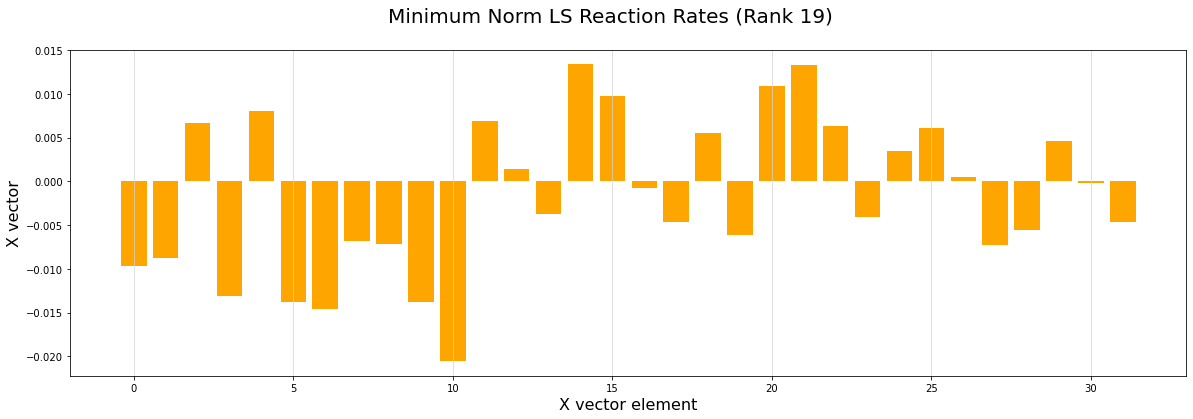

In [11]:
'''Minimum norm least-squares reaction rates'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,6))
ax.bar(range(x_vec.size), x_vec, color='orange')

ax.set_ylabel('X vector',fontsize=16)
ax.set_xlabel('X vector element',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Minimum Norm LS Reaction Rates (Rank %s)'%str(a_rank),fontsize=20)
plt.show()